# Problem statement

+To forecast level of CO2 emission for the upcoming years by an Industry

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Loading the dataset

In [ ]:
carbondioxide_level=pd.read_excel('Co2 emission levels.xlsx', parse_dates=True,squeeze=True)

In [ ]:
#First five records of the dataset
carbondioxide_level.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [ ]:
#Last five records of the dataset
carbondioxide_level.tail()

,Year,CO2
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


# Data Insights

In [ ]:
#number of rows and columns
carbondioxide_level.shape

(215, 2)

From Above Results There are 215 Rows And 2 Columns

In [ ]:
#Type Of Dataset
carbondioxide_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


From Above There is No-Null Count, And the Year data type is int64 And co2 data type is float64

In [ ]:
carbondioxide_level.index

RangeIndex(start=0, stop=215, step=1)

<AxesSubplot:>

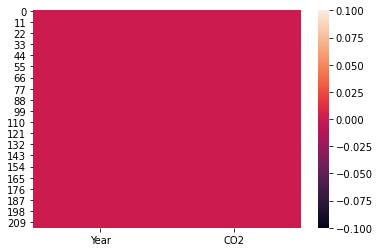

In [ ]:
sns.heatmap(carbondioxide_level.isnull())

From Aove There is NO-Null Values in this dataset
CO2 emissions for the year 1800 to 2014

In [ ]:
#Check the duplicate values
carbondioxide_level[carbondioxide_level.duplicated()]

,Year,CO2


from Above There is No Duplicate values or columns

In [ ]:
carbondioxide_level.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


# VISUALIZATION AND DECOMPOSITION OF DATA

<AxesSubplot:>

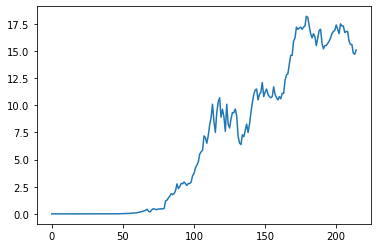

In [ ]:
#check the type of dataset
carbondioxide_level.CO2.plot()

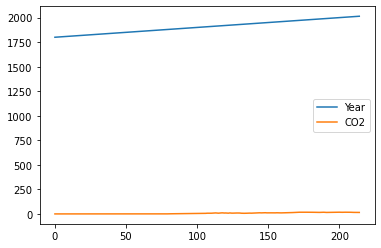

In [ ]:
# line plot for co2
from pandas import read_csv
from matplotlib import pyplot
carbondioxide_level.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'CO2'}>]], dtype=object)

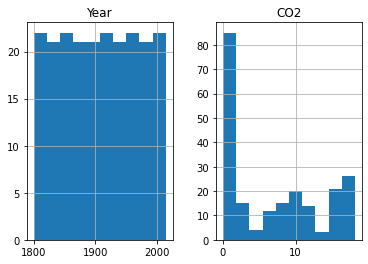

In [ ]:
#Histogram For Year And co2
carbondioxide_level.hist()

<AxesSubplot:xlabel='CO2'>

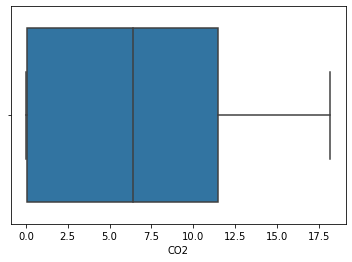

In [ ]:
#Check the Outlier value for the Dataset
sns.boxplot(carbondioxide_level['CO2'])

From Above Boxplot there is no outlier detected in this dataset
the range of CO2 emission lies between 0 to around 18

<Figure size 4320x4320 with 0 Axes>

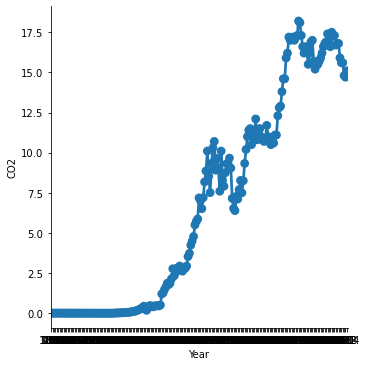

In [ ]:
plt.figure(figsize=(60,60))
sns.factorplot("Year","CO2",data=carbondioxide_level)
plt.show()

# Data Driven models

# Moving average

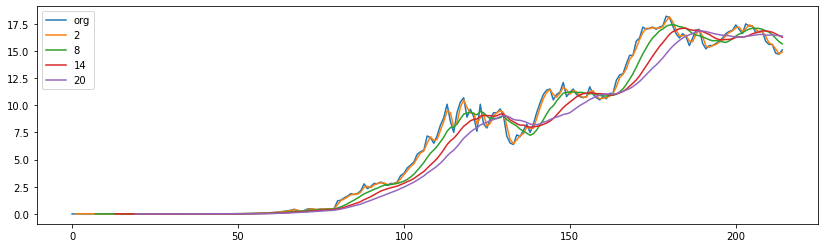

In [ ]:
plt.figure(figsize=(14,4))
carbondioxide_level.CO2.plot(label="org")
for i in range(2,24,6):
    carbondioxide_level["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

The emissions mean and the variation in standard deviation vary with time. This shows that the series has a trend. So, it is not a stationary.

# Time Series Decomposition plots

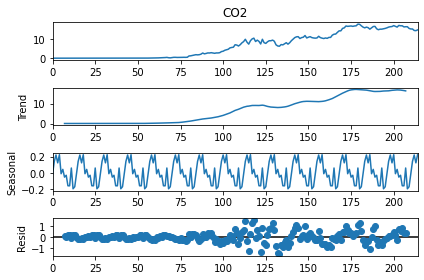

In [ ]:
decompose_ts_add = seasonal_decompose(carbondioxide_level.CO2,freq=14,model="additive")
decompose_ts_add.plot()
plt.show()

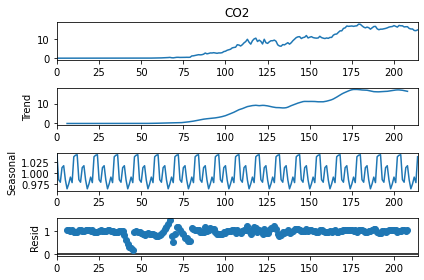

In [ ]:
decompose_ts_add = seasonal_decompose(carbondioxide_level.CO2,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

# GRAPHICALLY TESTED STATIONARY

In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [ ]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

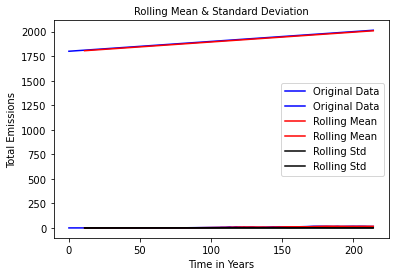

In [ ]:
TestStationaryPlot(carbondioxide_level)

# TEST STATIONARY USING DICKEY-FULLER

In [ ]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts['CO2'].values, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
TestStationaryAdfuller(carbondioxide_level)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# TO TANSFORM THE DATASET INTO STATIONARY

# The most common method of dealing with both trend and seasonality is differencing.
#Eliminating trend and seasonality: Differencing

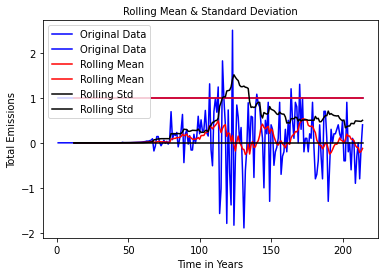

In [ ]:
CO2_first_difference = carbondioxide_level - carbondioxide_level.shift(1)  
TestStationaryPlot(CO2_first_difference.dropna(inplace=False))

In [ ]:
TestStationaryAdfuller(CO2_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly.We also used the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.¶

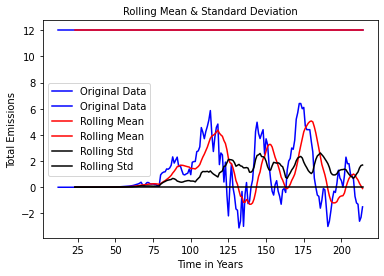

In [ ]:
CO2_seasonal_difference = carbondioxide_level - carbondioxide_level.shift(12)  
TestStationaryPlot(CO2_seasonal_difference.dropna(inplace=False))

In [ ]:
TestStationaryAdfuller(CO2_seasonal_difference.dropna(inplace=False))

Test Statistic                  -1.847905
p-value                          0.356951
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


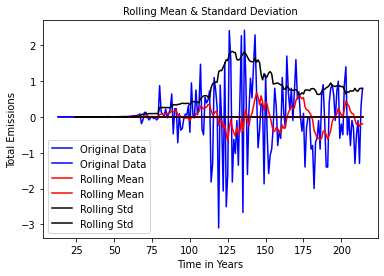

In [ ]:
CO2_seasonal_first_difference = CO2_first_difference - CO2_first_difference.shift(12)  
TestStationaryPlot(CO2_seasonal_first_difference.dropna(inplace=False))

In [ ]:
TestStationaryAdfuller(CO2_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -6.831718e+00
p-value                        1.886305e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.870000e+02
Critical Value (1%)           -3.465812e+00
Critical Value (5%)           -2.877123e+00
Critical Value (10%)          -2.575077e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


# FIND OPTIMAL PARAMETERS AND BUILD ARIMA MODEL.

1.Number of Auto-Regressive (AR) terms (p)
2.Number of Moving Average(MA) terms (q)
3.Number of Differences (d)

# Plot the ACF and PACF charts and find the optimal parameters

# 1.Autocorrelation Function (ACF)

It is a measure of the correlation between the the time series (ts) with a lagged version of itself.


# ACF and PACF plots

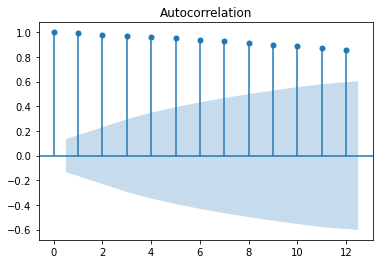

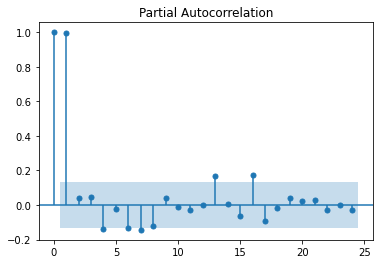

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(carbondioxide_level.CO2,lags=12)
tsa_plots.plot_pacf(carbondioxide_level.CO2)
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
warnings.filterwarnings("ignore") 

# GRID SEARCH

To find the optimal parameters for ARIMA models using the graphical method is not trivial and it is time consuming. We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. The grid search iteratively explore different combinations of the parameters.

In [ ]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score

# AIC (Akaike Information Criterion) value

AIC will choose the best model from a set(The “best” model will be the one that neither under-fits nor over-fits.),then consider running a hypothesis test to figure out the relationship between the variables in your model and the outcome of interest.

In [ ]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(carbondioxide_level,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [ ]:
mod = sm.tsa.statespace.SARIMAX(carbondioxide_level.CO2, trend='n', order=(0,1,0), seasonal_order=(0,0,1,12))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  215
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -176.216
Date:                              Fri, 09 Jul 2021   AIC                            356.432
Time:                                      12:58:31   BIC                            363.164
Sample:                                           0   HQIC                           359.152
                                              - 215                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0465      0.050     -0.925      0.355      -0.145       0.052
sigma2         0.30

# The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

# Get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

<AxesSubplot:>

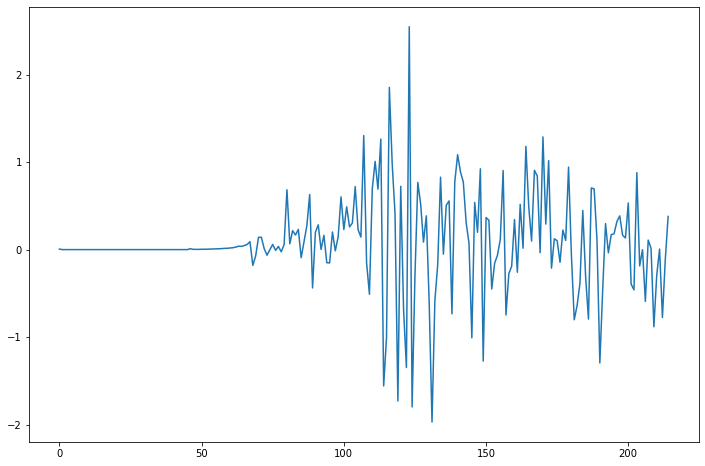

In [ ]:
results.resid.plot(figsize=(12,8))

In [ ]:
print(results.resid.describe())

count    215.000000
mean       0.073984
std        0.546243
min       -1.970341
25%       -0.005524
50%        0.004696
75%        0.244870
max        2.546826
dtype: float64


# The figure displays the distribution of the residual errors. It shows a little bias in the prediction.

# we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

<AxesSubplot:ylabel='Density'>

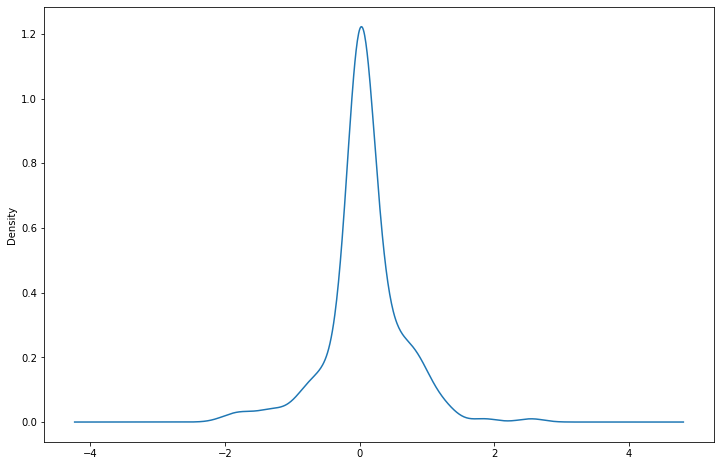

In [ ]:
results.resid.plot(figsize=(12,8),kind='kde')

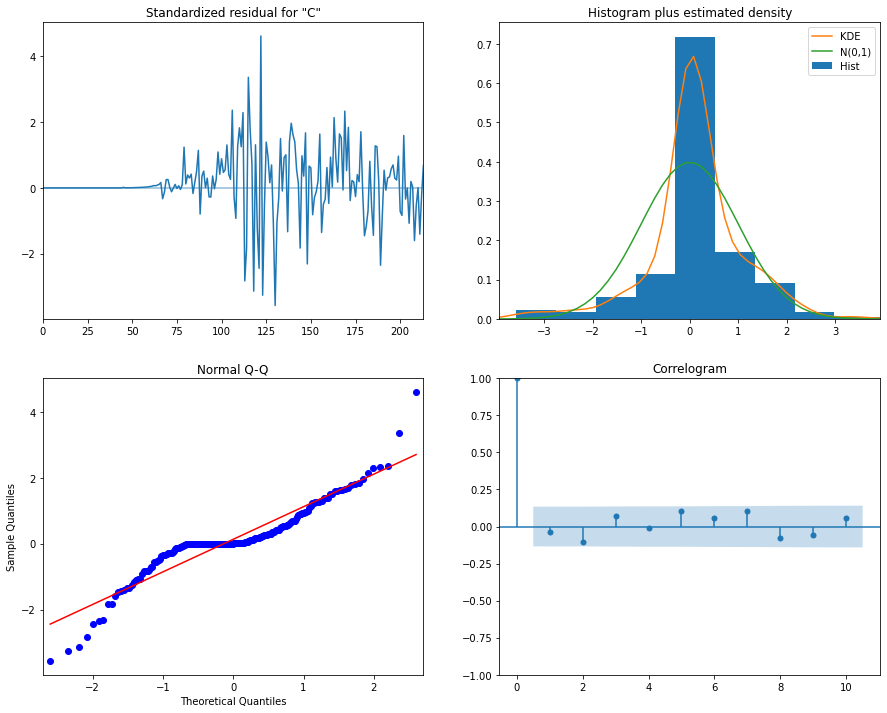

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### The model diagnostic suggests that the model residual is normally distributed based on the following:

In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.



# conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# VALIDATING PREDICTION

# We will compare predicted values to real values of the time series, which will help us understand the accuracy of our forecast.